### Calling on python script

In [1]:
# Python Scripts
%run -i "Scripts/script.py"

/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/magics/execution.py:816: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exit_ignore=exit_ignore)
Scripts/script.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_company_name_id.drop_duplicates(subset="name", inplace=True)
Scripts/script.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_company_name_id["name"] = a_company_name_id["name"].str.replace(i, "", case = False)
Scripts/script.py:78: SettingWithCopy

## Combining a__company.csv with a__geo.csv

In [28]:
# Merging datasets using geo_id column
a_company_all = pd.merge(a_company_csv, a_geo_csv, on="geo_id", how="inner")

In [29]:
a_company_all.head()

,vendor_id,parent_vendor_id,top_vendor_id,cnt_children,orgtype_id,geo_id,name,email,phone,fax,...,state_fips,timezone,daylight_saving,region,division,congress_district,congress_land_area,country_y,continent,country_iso2
0,26303872,NaN,26303872.0,0,0,100239,"LHASA, LLC [DUNS",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
1,143446948,NaN,143446948.0,0,0,100239,LONG LEWIS FORD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
2,151786331,NaN,151786331.0,0,0,100239,LeChris,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
3,285649634,NaN,285649634.0,0,0,100239,Lisa's Kayaks Inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
4,152312291,NaN,152312291.0,0,0,100239,LAURA NUNEZ VILLARTE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US


In [30]:
a_company_all.shape

(76344, 45)

In [31]:
# Looking for any duplicated columns
a_company_all.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [32]:
a_company_all.columns

Index(['vendor_id', 'parent_vendor_id', 'top_vendor_id', 'cnt_children',
       'orgtype_id', 'geo_id', 'name', 'email', 'phone', 'fax', 'dunsnumber',
       'websiteurl', 'address', 'address1', 'address2', 'country_x',
       'zipcode_x', 'parentdunsnumber', 'score', 'cnt_opp', 'bucket_id',
       'load_date', 'lvl', 'zipcode_y', 'is_primary', 'latitude', 'longitude',
       'elevation', 'state', 'state_full_name', 'area_code', 'city',
       'city_display', 'county', 'county_fips', 'state_fips', 'timezone',
       'daylight_saving', 'region', 'division', 'congress_district',
       'congress_land_area', 'country_y', 'continent', 'country_iso2'],
      dtype='object')

## Graphing Missing Values

In [33]:
a_company_all.isna().sum().sum()

1049160

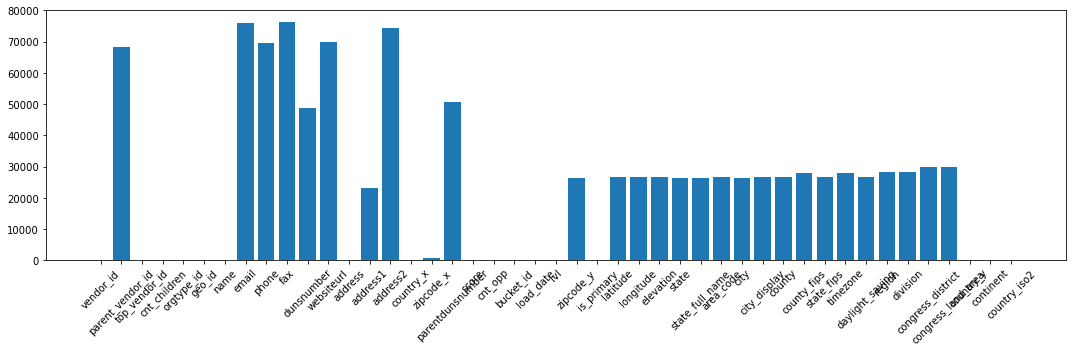

In [34]:
# Creating a bar plot

fig, ax = plt.subplots(figsize=(15, 5))

x = a_company_all.isna().sum().index  # Retrieving column name with missing values
y = a_company_all.isna().sum()  # Number of values missing
ax.bar(x=x, height=y)
ax.set_xticklabels(x, rotation = 45)
plt.tight_layout();

In [35]:
a_company_all.isna().sum()

vendor_id                 0
parent_vendor_id      68387
top_vendor_id            32
cnt_children              0
orgtype_id                0
geo_id                    0
name                      0
email                 75929
phone                 69689
fax                   76344
dunsnumber            48659
websiteurl            69722
address                   0
address1              23127
address2              74273
country_x                 8
zipcode_x               821
parentdunsnumber      50753
score                     0
cnt_opp                   0
bucket_id                 0
load_date                 0
lvl                      32
zipcode_y             26477
is_primary                0
latitude              26668
longitude             26668
elevation             26677
state                 26477
state_full_name       26484
area_code             26668
city                  26477
city_display          26668
county                26675
county_fips           28036
state_fips          

## Combining b__company.csv, b__address.csv, and b__hierarchy.csv

In [36]:
# Merging b__address.csv and b__hierarchy.csv using b_entity_id column
b_address_hierarchy = pd.merge(b_address_csv, b_hierarchy, on="b_entity_id", how="inner")

In [37]:
# Merging b_address_hierarchy and b_company.csv using b_entity_id
b_company_all = pd.merge(b_company_csv, b_address_hierarchy, on="b_entity_id", how="inner")

In [38]:
b_company_all.head()

,b_entity_id,entity_name,entity_proper_name,primary_sic_code,industry_code,sector_code,iso_country_x,metro_area,state_province_x,zip_postal_code,...,tele_area,tele,tele_full,fax_country,fax_area,fax,fax_full,hq,b_parent_entity_id,b_ultimate_parent_entity_id
0,000BFG-E,LOTSOFF CORP,LOT$OFF Corp.,5331.0,3520.0,3500.0,US,San Antonio/TX Metro,TX,78209-4859,...,210,805.9300,1.210.805.9300,NaN,NaN,NaN,NaN,1,NaN,000BFG-E
1,000P08-E,LASERSCOPE INC,"Laserscope, Inc.",3845.0,2325.0,2300.0,US,San Francisco/CA Metro,CA,95134-2011,...,408,943.0636,1.408.943.0636,1.0,408,943.1051,1.408.943.1051,1,002Y7X-E,00FV7G-E
2,000JF6-E,LONGWEN GROUP CORP,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,818,701.5432,1.818.701.5432,1.0,NaN,NaN,NaN,0,NaN,000JF6-E
3,000JF6-E,LONGWEN GROUP CORP,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,801,209.0740,1.801.209.0740,1.0,801,NaN,NaN,0,NaN,000JF6-E
4,000JF6-E,LONGWEN GROUP CORP,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,480,607.4393,1.480.607.4393,1.0,480,NaN,NaN,1,NaN,000JF6-E


In [39]:
b_company_all.shape

(84882, 37)

## Graphing Missing Values

In [40]:
b_company_all.isna().sum().sum()

917949

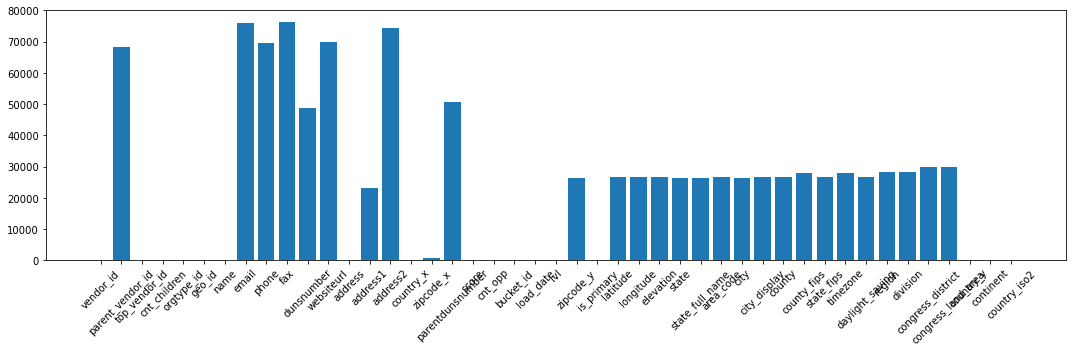

In [41]:
# Creating a bar plot

fig, ax = plt.subplots(figsize=(15, 5))

x = a_company_all.isna().sum().index  # Retrieving column name with missing values
y = a_company_all.isna().sum()  # Number of values missing
ax.bar(x=x, height=y)
ax.set_xticklabels(x, rotation = 45)
plt.tight_layout();

In [42]:
b_company_all.isna().sum()

b_entity_id                        0
entity_name                        0
entity_proper_name                 0
primary_sic_code               33811
industry_code                  33806
sector_code                    33806
iso_country_x                     12
metro_area                     15856
state_province_x               14522
zip_postal_code                16380
web_site                       49098
entity_type                        0
entity_sub_type                    0
year_founded                   66853
iso_country_incorp                12
iso_country_cor                74185
nace_code                      33811
address_id                         0
location_city                   5726
state_province_y               14688
location_postal_code           16630
city_state_zip                  5726
location_street1               12586
location_street2               55033
location_street3               78370
iso_country_y                     12
tele_country                     157
t

## Preprocessing a_company_all

In [43]:
a_company_all.head()

,vendor_id,parent_vendor_id,top_vendor_id,cnt_children,orgtype_id,geo_id,name,email,phone,fax,...,state_fips,timezone,daylight_saving,region,division,congress_district,congress_land_area,country_y,continent,country_iso2
0,26303872,NaN,26303872.0,0,0,100239,"LHASA, LLC [DUNS",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
1,143446948,NaN,143446948.0,0,0,100239,LONG LEWIS FORD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
2,151786331,NaN,151786331.0,0,0,100239,LeChris,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
3,285649634,NaN,285649634.0,0,0,100239,Lisa's Kayaks Inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
4,152312291,NaN,152312291.0,0,0,100239,LAURA NUNEZ VILLARTE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US


In [44]:
a_company_all.dtypes

vendor_id               int64
parent_vendor_id      float64
top_vendor_id         float64
cnt_children            int64
orgtype_id              int64
geo_id                  int64
name                   object
email                  object
phone                  object
fax                   float64
dunsnumber            float64
websiteurl             object
address                object
address1               object
address2               object
country_x              object
zipcode_x              object
parentdunsnumber      float64
score                   int64
cnt_opp                 int64
bucket_id               int64
load_date              object
lvl                   float64
zipcode_y              object
is_primary             object
latitude               object
longitude              object
elevation             float64
state                  object
state_full_name        object
area_code              object
city                   object
city_display           object
county    

In [45]:
def clean_text(df, column:str):
    """Make text lowercase, 
    remove square brackers,
    and remove punctuations"""
    df[column] = [names.lower() for names in df[column]]  # Convert all letter to lowercase
    df[column] = [names.encode("ascii", errors="ignore").decode() for names in df[column]] # Remove non ascii chars
    df[column] = [re.sub("\[.*?\]", "", names) for names in df[column]]  # Remove anything in brackets
    df[column] = [re.sub("[%s]" % re.escape(string.punctuation), "", names) for names in df[column]]  # Remove punctuations
    df[column] = [re.sub("\w*\d\w*", "", names) for names in df[column]]  # Remove words with numbers in them
    return df[column]

a_company_all["name"] = clean_text(a_company_all, "name")

In [46]:
a_company_all.head()

,vendor_id,parent_vendor_id,top_vendor_id,cnt_children,orgtype_id,geo_id,name,email,phone,fax,...,state_fips,timezone,daylight_saving,region,division,congress_district,congress_land_area,country_y,continent,country_iso2
0,26303872,NaN,26303872.0,0,0,100239,lhasa llc duns,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
1,143446948,NaN,143446948.0,0,0,100239,long lewis ford,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
2,151786331,NaN,151786331.0,0,0,100239,lechris,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
3,285649634,NaN,285649634.0,0,0,100239,lisas kayaks inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US
4,152312291,NaN,152312291.0,0,0,100239,laura nunez villarte,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,North America,US


In [47]:
# Separting rows to name and vendor id
a_company_name_id = a_company_all[["vendor_id", "name"]]

In [48]:
a_company_name_id.head()

,vendor_id,name
0,26303872,lhasa llc duns
1,143446948,long lewis ford
2,151786331,lechris
3,285649634,lisas kayaks inc
4,152312291,laura nunez villarte


In [69]:
# Checking for duplicated names
a_company_name_id["name"].duplicated().sum()

12613

In [70]:
# Removing duplicated names
a_company_name_id.drop_duplicates(subset="name", inplace=True)
a_company_name_id["name"].duplicated().sum()

/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [173]:
# Removing business abbreviations
remove_words = ["healthcare", "corporations", "llc", "corp", "parnters", "inc", "co", "corporation", "ltd"]
for i in remove_words:
    a_company_name_id["name"] = a_company_name_id["name"].str.replace(i, "", case = False)

/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Preprocessing b_company_all

In [50]:
b_company_all.head()

,b_entity_id,entity_name,entity_proper_name,primary_sic_code,industry_code,sector_code,iso_country_x,metro_area,state_province_x,zip_postal_code,...,tele_area,tele,tele_full,fax_country,fax_area,fax,fax_full,hq,b_parent_entity_id,b_ultimate_parent_entity_id
0,000BFG-E,LOTSOFF CORP,LOT$OFF Corp.,5331.0,3520.0,3500.0,US,San Antonio/TX Metro,TX,78209-4859,...,210,805.9300,1.210.805.9300,NaN,NaN,NaN,NaN,1,NaN,000BFG-E
1,000P08-E,LASERSCOPE INC,"Laserscope, Inc.",3845.0,2325.0,2300.0,US,San Francisco/CA Metro,CA,95134-2011,...,408,943.0636,1.408.943.0636,1.0,408,943.1051,1.408.943.1051,1,002Y7X-E,00FV7G-E
2,000JF6-E,LONGWEN GROUP CORP,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,818,701.5432,1.818.701.5432,1.0,NaN,NaN,NaN,0,NaN,000JF6-E
3,000JF6-E,LONGWEN GROUP CORP,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,801,209.0740,1.801.209.0740,1.0,801,NaN,NaN,0,NaN,000JF6-E
4,000JF6-E,LONGWEN GROUP CORP,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,480,607.4393,1.480.607.4393,1.0,480,NaN,NaN,1,NaN,000JF6-E


In [51]:
b_company_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84882 entries, 0 to 84881
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   b_entity_id                  84882 non-null  object 
 1   entity_name                  84882 non-null  object 
 2   entity_proper_name           84882 non-null  object 
 3   primary_sic_code             51071 non-null  float64
 4   industry_code                51076 non-null  float64
 5   sector_code                  51076 non-null  float64
 6   iso_country_x                84870 non-null  object 
 7   metro_area                   69026 non-null  object 
 8   state_province_x             70360 non-null  object 
 9   zip_postal_code              68502 non-null  object 
 10  web_site                     35784 non-null  object 
 11  entity_type                  84882 non-null  object 
 12  entity_sub_type              84882 non-null  object 
 13  year_founded    

In [52]:
"""
Using the clean_text
function in order to
clean the text similar to
a_company_all
"""

b_company_all["entity_name"] = clean_text(b_company_all, "entity_name")

In [53]:
b_company_all.head()

,b_entity_id,entity_name,entity_proper_name,primary_sic_code,industry_code,sector_code,iso_country_x,metro_area,state_province_x,zip_postal_code,...,tele_area,tele,tele_full,fax_country,fax_area,fax,fax_full,hq,b_parent_entity_id,b_ultimate_parent_entity_id
0,000BFG-E,lotsoff corp,LOT$OFF Corp.,5331.0,3520.0,3500.0,US,San Antonio/TX Metro,TX,78209-4859,...,210,805.9300,1.210.805.9300,NaN,NaN,NaN,NaN,1,NaN,000BFG-E
1,000P08-E,laserscope inc,"Laserscope, Inc.",3845.0,2325.0,2300.0,US,San Francisco/CA Metro,CA,95134-2011,...,408,943.0636,1.408.943.0636,1.0,408,943.1051,1.408.943.1051,1,002Y7X-E,00FV7G-E
2,000JF6-E,longwen group corp,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,818,701.5432,1.818.701.5432,1.0,NaN,NaN,NaN,0,NaN,000JF6-E
3,000JF6-E,longwen group corp,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,801,209.0740,1.801.209.0740,1.0,801,NaN,NaN,0,NaN,000JF6-E
4,000JF6-E,longwen group corp,Longwen Group Corp.,6799.0,3320.0,3300.0,US,Phoenix/AZ Metro,AZ,85258,...,480,607.4393,1.480.607.4393,1.0,480,NaN,NaN,1,NaN,000JF6-E


In [54]:
# Separting rows to name and vendor id
b_company_name_id = b_company_all[["b_entity_id", "entity_name"]]

b_company_name_id.head()

,b_entity_id,entity_name
0,000BFG-E,lotsoff corp
1,000P08-E,laserscope inc
2,000JF6-E,longwen group corp
3,000JF6-E,longwen group corp
4,000JF6-E,longwen group corp


In [71]:
# Checking for duplicated names
b_company_name_id["entity_name"].duplicated().sum()

5066

In [72]:
# Removing duplicated names
b_company_name_id.drop_duplicates(subset="entity_name", inplace=True)
b_company_name_id["entity_name"].duplicated().sum()

/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [73]:
# Removing business abbreviations
remove_words = ["healthcare", "corporations", "llc", "corp", "parnters", "inc", "co", "corporation", "ltd"]
for i in remove_words:
    b_company_name_id['entity_name'] = b_company_name_id['entity_name'].str.replace(i, "", case = False)

/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
